# Assignment 7 - Support Vector Machines (SVMs)

(20 points)

### Add your name(s) and EIDs below
- Student Name: Siem Yonas
- Student UT EID: sby237
- Partner Name:
- Partner UT EID:

### Grading clarifications
1. Before you submit:
    - **Please do not change or remove any variable names** we give you for your answer to each question. You can use other variables if you wish, but the final answer must be stored in that variable.
    - **Please don't use any other libraries** besides those provided in `requirements.txt`, and those [built in to Python](https://docs.python.org/3.8/library/index.html).
2. We will also be double-checking the autograder, so you won't lose points if your formatting causes it to deduct points (but please try to follow the points under 1).
3. After submitting, you may see "All test cases passed!" for Public Tests. Please note that this doesn't mean you have correctly answered every question, as there are no public tests. We will be using a series of hidden tests to verify your answers are correct.

In [1]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

## Heart Dataset 

In this Assignment we will work with some patients dataset. 

We have access to 303 patients data. The features are listed below. 

In [2]:
# Your code here
heart_df = pd.read_csv("Heart.csv")
heart_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**Age:** The person’s age in years

**Sex:** The person’s sex (1 = male, 0 = female)

**ChestPain:** chest pain type
* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

**RestBP:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**Chol:** The person’s cholesterol measurement in mg/dl

**Fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

**RestECG**: resting electrocardiographic results
* Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Value 1: normal
* Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**MaxHR:** The person’s maximum heart rate achieved

**ExAng:** Exercise induced angina (1 = yes; 0 = no)

**Oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot.)

**Slope:** the slope of the peak exercise ST segment
* 0: downsloping; 
* 1: flat; 
* 2: upsloping

**Ca:** The number of major vessels (0–3)

**Thal:** A blood disorder called thalassemia 
* Value 0: NULL (dropped from the dataset previously
* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target:** Heart disease (1 = yes; 0 = no)
- **Note**: For Q1, Q4, and Q5. your labels can be arbitrary. But, for Q3, you will need to ensure that "Yes" = 1 and "No" = -1, as an SVM predicts 1 and -1, not 1 and 0.

# Q1 

**Implement SVM using libraries**: We want to use a **support vector machine** to predict if each patient will have heart problems or not. The column "Target" in our datasets includes data about heart diseases. If the patient had heart disease, it is labeled "Yes", otherwise it is labeled "No".

As you did in Assignment 5, please prepare your dataset for predicting heart disease ("Target" column) by using 3 features:

- Age of the patient (Column **"Age"**)
- Gender of the patient (male or female - Column **"Sex"**)
- Cholestrol level of the patient (Column **"Chol"**) 


Split your data into 80% traning data and 20% test data.

Finally, implement a Support Vector Machine using Scikit-Learn and train it on your training set. (**4 points**)





<!-- BEGIN QUESTION -->



In [19]:
# Put the features into an "X" array, and target variable into a "y" array.
X = heart_df[["Age", "Sex", "Chol"]]
y = heart_df["Target"].map({'Yes':1, 'No':-1})

# Normalize input features
X = (X - X.mean())/X.std()


In [20]:
# Split your "X" and "y" arrays into training and testing sets. 
# You may use scikit-learn to do this.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(X_train)

          Age       Sex      Chol
102  0.283345 -1.454889  1.087491
261  0.393980 -1.454889  1.396509
228 -0.048563  0.685069 -0.785931
288  0.172709  0.685069 -0.496226
78  -0.712378  0.685069 -0.032699
..        ...       ...       ...
106  0.504616  0.685069 -1.346026
83   1.500339  0.685069  0.527396
17  -0.048563  0.685069 -0.148581
230 -0.269835 -1.454889 -0.979067
98  -0.269835  0.685069 -0.882499

[242 rows x 3 columns]


In [21]:
from sklearn import svm

# Create an SVM using SciKit-Learn, and train it on your training set.
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

SVC()

<!-- END QUESTION -->

# Q2

Calculate the accuracy, Precision, recall and F1 score of your **SVM** implementaion from Task 1 on the testing dataset. 
Print the results. You may use library methods for this task if you choose to. (**4 points**)

(This question will be manually graded.)


<!-- BEGIN QUESTION -->



In [22]:
from sklearn.metrics import classification_report
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.74      0.76      0.75        33
           1       0.70      0.68      0.69        28

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



<!-- END QUESTION -->

# Q3 

**Implement SVM without using libraries**: Implement a SVM from scratch using the hinge loss 
function and gradient descent. Try to replicate the same results as you got from the scikit-learn
SVM. Report the accuracy, precision, recall, and F1-score of your model.

- You can re-use your training/testing set from Q1, but you may need to rename your target variable (e.g. "No", "Yes") to a number. If so,
  assign 1 to "Yes"es and -1 to "No"s. (**Note: setting "No"s to -1 is very important here!**)
- Do as many iterations as needed, with a maximum of **100 iterations**.
- Use a very small learning rate for checking your GD implementation. 
- You are allowed to use your choice of learning rate, like using 0.0001, 0.001 or 0.01 or 0.1 or higher. 
- Visualize your costs with a plot (similar to Assignments 5 and 6). 
- No need to add an y-intercept in this task.
- You can use libraries to report the accuracy, precision, recall and F1-score. 

(**4 points - 2 for code, 1 for metrics, 1 for visualization**)

**Hint**: Here are the formulae for hinge loss and its gradient:

Hinge loss function (with regularization):
$$ 
cost = \frac{ \lambda }{ 2 } ||w||^2 + \frac{1}{N} \sum_i^n max(0, 1 - y_i (w \cdot x_i))
$$
- $x_i$: Training sample $x_i$
- $y_i$: Training label $y_i$
- $w$: SVM weights
- $N$: Number of elements
- $\lambda$: Regularization parameter, $= \frac{1}{N \times c}$

Gradient of hinge loss:

$$gradient(w)=\frac{1}{N}\sum_i^n
\begin{cases}
w &  \text{ if } max(0, y_i (w \cdot x_i)) = 0 \\
w - c y_i x_i &  \text{otherwise}
\end{cases}
$$



<!-- BEGIN QUESTION -->



In [23]:
# Implement hinge cost and its gradient function.
def hinge_loss(X, y, W, c):
    """Calculate the hinge loss function, with regularization.
    
    Parameters:
        X: Training set samples
        y: Training set labels
        W: Current weights of the SVM.
        c: The term c in the formula above (used to define lambda)

    Returns:
        hinge_loss: The hinge loss.
    """
    n = X.shape[0]
    distances = 1 - y * (np.dot(X, W))
    
    # This is our max(0, distance). 
    distances[distances < 0] = 0 
    
    hinge_loss = c * (np.sum(distances) / n)
    # This divide by 2 is not important. You can skip doing it 
    # because we want only to check if this cost is going down or not. 
    return (1 / 2 * np.dot(W, W) + hinge_loss)
    
    hinge_loss = ...
    return hinge_loss

def hinge_loss_gradient(X, y, W, c):
    """Calculate the gradient of the hinge loss function.
    
    Parameters:
        X: Training set samples
        y: Training set labels
        W: Current weights of the SVM.
        c: The term c in the formula above (used to define lambda)

    Returns:
        dW: The gradient of the hinge loss with respect to each feature.
    """
    if type(y) == np.float64:
        y = np.array([y])
        X = np.array([X])
        
    if type(y) == pd.Series:
        y = y.values
        X = X.values
        
    distance = 1 - (y * np.dot(X, W))
    
    dw = np.zeros(len(W))
    
    for ind, d in enumerate(distance):
        
        if (d < 0):
            di = W
        else:
            di = W - (c * y[ind] * X[ind])
            
            
        dw += di
    
    dw = dw/len(y)  # average
    
    return dw

def predict_svm(X, W):
    """Predict the label for a set of samples, given an SVM
    with weights W. 
    
    (Hint: You won't need this for your gradient descent, just your
     final metrics collection)
     
    Parameters:
        X: Training set samples
        W: Current weights of the SVM.
        
    Returns:
        y_pred: Predicted classification of the samples.
    """
    y_pred = np.where(np.dot(X, W)<0, -1, 1)
    return y_pred

In [24]:
# Implement an iterative SVM trained via gradient descent. 
# Make sure your y-labels are in the right format (-1 for "No", 1 for "Yes")
weights = np.zeros(X.shape[1])
num_iterations = 100
lr = 0.1
c = 0.01
cost_list = []

# Implement gradient descent here.
for i in range(num_iterations):
    cost = hinge_loss(X_train, y_train, weights, c)
    cost_list.append(cost)
    
    grad = hinge_loss_gradient(X_train, y_train, weights, c)
    
    weights -= lr * grad
    
    print(f"Iteration {i+1:3}: Cost: {cost:5.4f}")
    
    

Iteration   1: Cost: 0.0100
Iteration   2: Cost: 0.0100
Iteration   3: Cost: 0.0100
Iteration   4: Cost: 0.0100
Iteration   5: Cost: 0.0100
Iteration   6: Cost: 0.0100
Iteration   7: Cost: 0.0100
Iteration   8: Cost: 0.0100
Iteration   9: Cost: 0.0100
Iteration  10: Cost: 0.0100
Iteration  11: Cost: 0.0100
Iteration  12: Cost: 0.0100
Iteration  13: Cost: 0.0100
Iteration  14: Cost: 0.0100
Iteration  15: Cost: 0.0100
Iteration  16: Cost: 0.0100
Iteration  17: Cost: 0.0100
Iteration  18: Cost: 0.0100
Iteration  19: Cost: 0.0100
Iteration  20: Cost: 0.0100
Iteration  21: Cost: 0.0100
Iteration  22: Cost: 0.0100
Iteration  23: Cost: 0.0100
Iteration  24: Cost: 0.0100
Iteration  25: Cost: 0.0100
Iteration  26: Cost: 0.0100
Iteration  27: Cost: 0.0100
Iteration  28: Cost: 0.0100
Iteration  29: Cost: 0.0100
Iteration  30: Cost: 0.0100
Iteration  31: Cost: 0.0100
Iteration  32: Cost: 0.0100
Iteration  33: Cost: 0.0100
Iteration  34: Cost: 0.0100
Iteration  35: Cost: 0.0100
Iteration  36: Cost:

Text(0, 0.5, 'Cost')

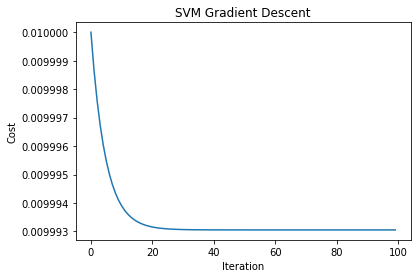

In [25]:
# Visualize your cost function over each iteration.
plt.plot(cost_list)
plt.title("SVM Gradient Descent")
plt.xlabel("Iteration")
plt.ylabel("Cost")

In [10]:
# Compute and print metrics for you SVM on the testing dataset.
y_pred = predict_svm(X_test, weights)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.78      0.55      0.64        33
           1       0.61      0.82      0.70        28

    accuracy                           0.67        61
   macro avg       0.69      0.68      0.67        61
weighted avg       0.70      0.67      0.67        61



<!-- END QUESTION -->

# Q4

**Compare SVM results to logistic regression**: Implement a logistic regression to solve this task, using libraries (like Assignment 5). Compare the performance of the logistic regression model to your SVM models on the testing dataset. You can use metrics like accuracy, precision, recall, the F1-score, and any other metric you think may be useful for this comparison. Which one performs better?

**(4 points - 2 for implemenation, 2 for description)**

(This question will be manually graded.)

The two models perform very similiarly. For this random state, precision is better for the SVM, the recall is better for SVM for -1 (No) and better for logistic regression for 1 (Yes), and the f1-score is higher for the SVM. In this random state, the SVM performed slightly better, but since the values are close, it is plausible that another split of the data could produce different results. 

<!-- BEGIN QUESTION -->



In [11]:
# Create a logistic regression model.
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

# Fit the model to your training data.
log_model.fit(X_train, y_train)

LogisticRegression()

In [12]:
# Analyze the performance of the logistic regression on the testing dataset.
y_pred = log_model.predict(X_test)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.74      0.70      0.72        33
           1       0.67      0.71      0.69        28

    accuracy                           0.70        61
   macro avg       0.70      0.71      0.70        61
weighted avg       0.71      0.70      0.71        61



<!-- END QUESTION -->

# Q5

**Apply a kernel function to your SVM**: Using the Scikit-learn library, revisit the SVM you implemented in Question 1 and experiment with different kernel functions. Can you improve its performance? Describe your results.

**(4 points - 2 for implementation, 2 for description)**

(This question will be manually graded.)

For this dataset, linear and poly kernels performed worse than the deafult rbf, having lower f1-scores as they trade precision for recall or vice-versa. Sigmoid had slightly worse metrics compared to rbf in general (seen below).

<!-- BEGIN QUESTION -->



In [13]:
# Create an SVM using SciKit-Learn, and train it on your training set. Experiment with different kernel types.
svm_model2 = svm.SVC(kernel="sigmoid")
svm_model2.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [14]:
# Analyze the performance of the SVM+kernel on the testing dataset.
y_pred = svm_model2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.70      0.64      0.67        33
           1       0.61      0.68      0.64        28

    accuracy                           0.66        61
   macro avg       0.66      0.66      0.66        61
weighted avg       0.66      0.66      0.66        61



<!-- END QUESTION -->

